<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [34]:
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.formula.api as smf

#### Read the dataset in the csv file from the URL


In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [9]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


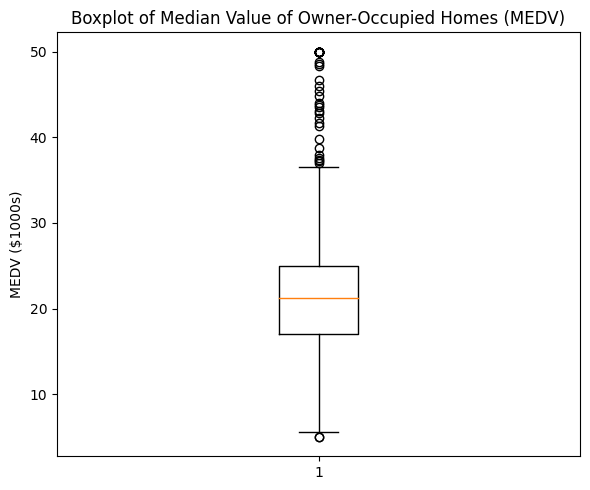

In [13]:




# 1) Boxplot: MEDIAN VALUE of owner-occupied homes (MEDV)
plt.figure(figsize=(6,5))
plt.boxplot(boston_df["MEDV"].dropna(), vert=True)
plt.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
plt.ylabel("MEDV ($1000s)")
plt.tight_layout()
plt.show()

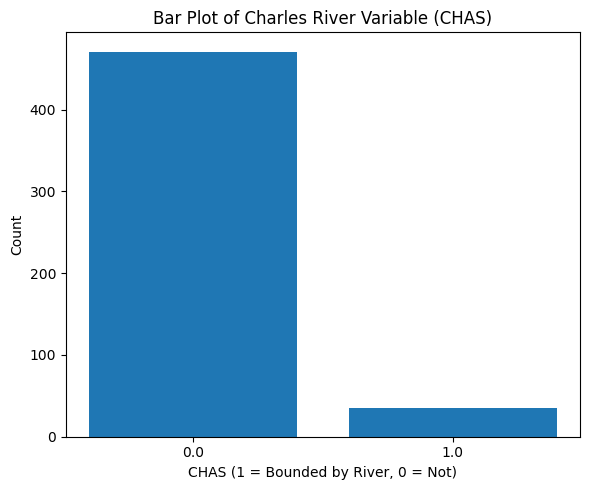

In [15]:
# 2) Bar plot for the Charles River variable (CHAS)
# CHAS = 1 if tract bounds river; 0 otherwise
chas_counts = boston_df["CHAS"].value_counts().sort_index()  # ensure 0 then 1
plt.figure(figsize=(6,5))
plt.bar(chas_counts.index.astype(str), chas_counts.values)
plt.title("Bar Plot of Charles River Variable (CHAS)")
plt.xlabel("CHAS (1 = Bounded by River, 0 = Not)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

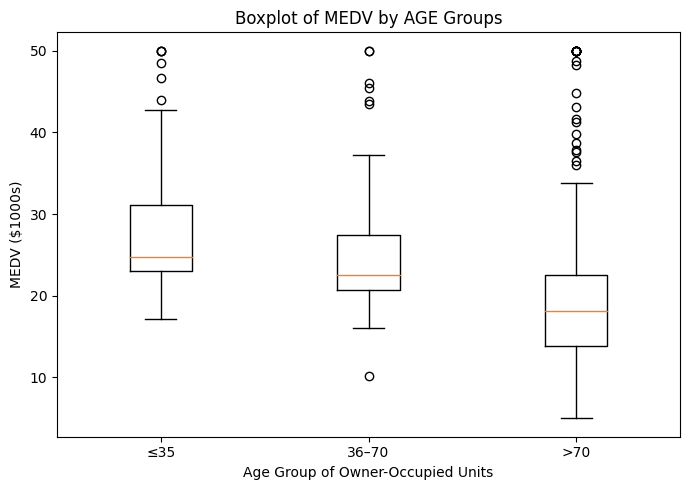

In [22]:
# 3) Boxplot for MEDV vs AGE groups
# Discretize AGE into three groups: ≤35, 36–70, >70
bins = [0, 35, 70, np.inf]
labels = ["≤35", "36–70", ">70"]
boston_df["AGE_GROUP"] = pd.cut(boston_df["AGE"], bins=bins, labels=labels, right=True, include_lowest=True)

# Create data in matching order for boxplot
grouped_medv = [boston_df.loc[boston_df["AGE_GROUP"] == lab, "MEDV"].dropna() for lab in labels]
plt.figure(figsize=(7,5))
plt.boxplot(grouped_medv, labels=labels, vert=True)
plt.title("Boxplot of MEDV by AGE Groups")
plt.xlabel("Age Group of Owner-Occupied Units")
plt.ylabel("MEDV ($1000s)")
plt.tight_layout()
plt.show()


In [27]:
# Task 3: Statistical Tests (α = 0.05)
# ---------------------------------
alpha = 0.05

def print_test_header(title):
    print("\n" + "="*len(title))
    print(title)
    print("="*len(title))

# 1) T-test: Difference in median value (MEDV) by Charles River (CHAS)
print_test_header("T-Test: MEDV difference by Charles River proximity (CHAS)")

print("Hypotheses:")
print("  H0: μ_MEDV|CHAS=0 = μ_MEDV|CHAS=1")
print("  H1: μ_MEDV|CHAS=0 ≠ μ_MEDV|CHAS=1")

chas0 = boston_df.loc[boston_df["CHAS"] == 0, "MEDV"].dropna()
chas1 = boston_df.loc[boston_df["CHAS"] == 1, "MEDV"].dropna()

# Welch's t-test (equal_var=False)
t_stat, p_val = stats.ttest_ind(chas0, chas1, equal_var=False)
print(f"Test statistic (t): {t_stat:.3f}")
print(f"P-value: {p_val:.4g}")

if p_val < alpha:
    print(f"Conclusion (@ α={alpha}): Reject H0 → Significant difference in MEDV between CHAS groups.")
else:
    print(f"Conclusion (@ α={alpha}): Fail to reject H0 → No significant difference in MEDV between CHAS groups.")



T-Test: MEDV difference by Charles River proximity (CHAS)
Hypotheses:
  H0: μ_MEDV|CHAS=0 = μ_MEDV|CHAS=1
  H1: μ_MEDV|CHAS=0 ≠ μ_MEDV|CHAS=1
Test statistic (t): -3.113
P-value: 0.003567
Conclusion (@ α=0.05): Reject H0 → Significant difference in MEDV between CHAS groups.


In [28]:

# 2) ANOVA: MEDV differences across AGE groups
print_test_header("ANOVA: MEDV differences across AGE groups")

print("Hypotheses:")
print("  H0: μ_MEDV|≤35 = μ_MEDV|36–70 = μ_MEDV|>70")
print("  H1: At least one group mean differs.")

# Ensure no empty groups
groups_for_anova = [g for g in grouped_medv if len(g) > 0]
anova_F, anova_p = stats.f_oneway(*groups_for_anova)
print(f"F statistic: {anova_F:.3f}")
print(f"P-value: {anova_p:.4g}")

if anova_p < alpha:
    print(f"Conclusion (@ α={alpha}): Reject H0 → Significant differences in MEDV across AGE groups.")
else:
    print(f"Conclusion (@ α={alpha}): Fail to reject H0 → No significant differences across AGE groups.")



ANOVA: MEDV differences across AGE groups
Hypotheses:
  H0: μ_MEDV|≤35 = μ_MEDV|36–70 = μ_MEDV|>70
  H1: At least one group mean differs.
F statistic: 36.408
P-value: 1.711e-15
Conclusion (@ α=0.05): Reject H0 → Significant differences in MEDV across AGE groups.



Pearson Correlation: NOX vs INDUS
Hypotheses:
  H0: ρ = 0 (no linear correlation)
  H1: ρ ≠ 0 (non-zero linear correlation)
Correlation coefficient (r): 0.764
P-value: 7.913e-98
Conclusion (@ α=0.05): Reject H0 → There is a significant linear relationship between NOX and INDUS.


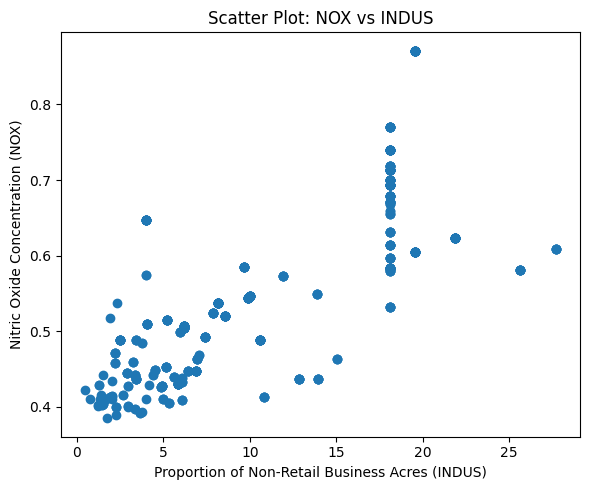

In [32]:
# 3) Pearson correlation: NOX vs INDUS
print_test_header("Pearson Correlation: NOX vs INDUS")

print("Hypotheses:")
print("  H0: ρ = 0 (no linear correlation)")
print("  H1: ρ ≠ 0 (non-zero linear correlation)")

corr, corr_p = stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])
print(f"Correlation coefficient (r): {corr:.3f}")
print(f"P-value: {corr_p:.4g}")

if corr_p < alpha:
    print(f"Conclusion (@ α={alpha}): Reject H0 → There is a significant linear relationship between NOX and INDUS.")
else:
    print(f"Conclusion (@ α={alpha}): Fail to reject H0 → No significant linear relationship detected.")

# Scatter plot: NOX vs INDUS
plt.figure(figsize=(6,5))
plt.scatter(boston_df["INDUS"], boston_df["NOX"])
plt.title("Scatter Plot: NOX vs INDUS")
plt.xlabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.ylabel("Nitric Oxide Concentration (NOX)")
plt.tight_layout()
plt.show()


Regression: Impact of DIS (distance to employment centers) on MEDV
Hypotheses:
  H0: β1 = 0 (no effect of DIS on MEDV)
  H1: β1 ≠ 0 (DIS has an effect on MEDV)
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 24 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        17:48:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      

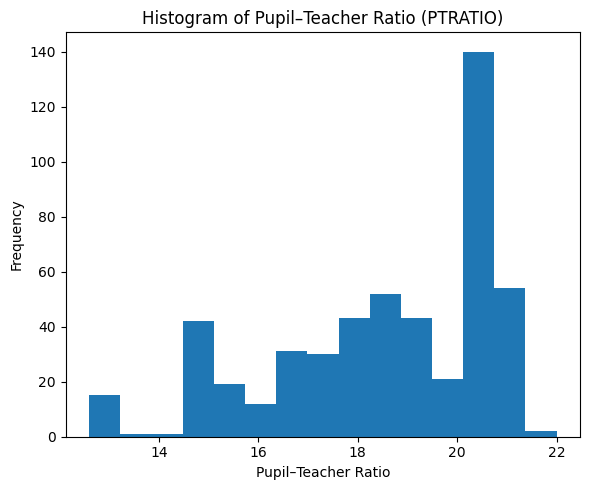

In [36]:
# 4) Regression: Impact of DIS on MEDV (simple OLS)
print_test_header("Regression: Impact of DIS (distance to employment centers) on MEDV")

print("Hypotheses:")
print("  H0: β1 = 0 (no effect of DIS on MEDV)")
print("  H1: β1 ≠ 0 (DIS has an effect on MEDV)")

model = smf.ols("MEDV ~ DIS", data=boston_df).fit()
print(model.summary())

beta1 = model.params.get("DIS", np.nan)
p_beta1 = model.pvalues.get("DIS", np.nan)
r2 = model.rsquared

if p_beta1 < alpha:
    print(f"Conclusion (@ α={alpha}): Reject H0 → DIS has a significant effect on MEDV.")
else:
    print(f"Conclusion (@ α={alpha}): Fail to reject H0 → No significant effect of DIS on MEDV.")

print(f"Interpretation: Each additional unit of DIS changes MEDV by approximately {beta1:.3f} ($1000s).")
print(f"Model R^2: {r2:.3f} (proportion of variance explained)")

# Histogram: PTRATIO (pupil-teacher ratio)
plt.figure(figsize=(6,5))
plt.hist(boston_df["PTRATIO"].dropna(), bins=15)
plt.title("Histogram of Pupil–Teacher Ratio (PTRATIO)")
plt.xlabel("Pupil–Teacher Ratio")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()